- 1
В соответствии с вашим вариантом постройте график функции с помощью
графического пакета языка программирования, с которым Вы работаете.
- 2
Напишите программу определения минимума функции с использованием метода
прямого поиска (см. вариант). Вывод промежуточных итераций обязателен.
- 3
Напишите программу определения минимума функции с использованием
градиентного метода (см. вариант). Вывод промежуточных итераций обязателен.
- 4
Для каждого метода выполните три итерации вручную.
Для выполнения задания могут быть использованы языки программирования (С++, Pascal,
Python и др.). Недостающие данные выберите сами.
Не используйте пакеты прикладных программ!!! Пишем программу на одном их языков
программирования.
- 5
Сравните методы по числу итераций.

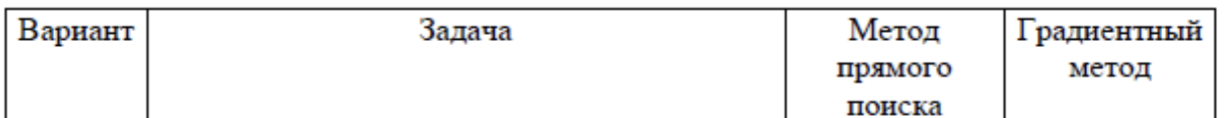

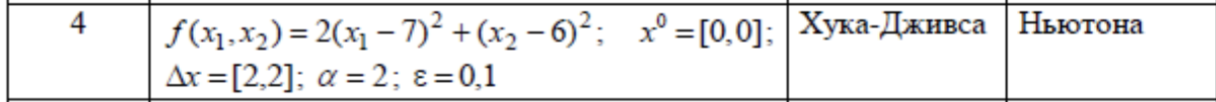

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## График функции

In [33]:
def f(x1, x2):
    return 2*(x1-7)**2 + (x2-6)**2

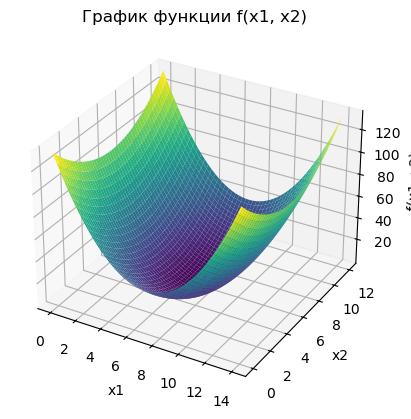

In [34]:
x1 = np.linspace(0, 14, 400)
x2 = np.linspace(0, 12, 400)
x1, x2 = np.meshgrid(x1, x2)

z = f(x1, x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

ax.set_title('График функции f(x1, x2)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

plt.show()

## Метод прямого поиска Хука-Дживса

Суть метода: нахождение в окрестности текущей точки
наилучшей и движение в этом направлении.
Если значение в окрестных точках больше чем в
текущей, то происходит уменьшение шага.

In [35]:
def f_arr(array):
    return 2*(array[0]-7)**2 + (array[1]-6)**2

In [36]:
f_arr([8, 0])

38

In [49]:
%%time 

def hooke_jeeves(x0=[0, 0], D=[2, 2], a=2, e=0.1):
    x_k = np.array(x0)              
    x_k_minus_1 = np.array(x0)     
    step_size = np.array(D, dtype=float) 

    iteration = 0
    while True:
        iteration += 1
        
        found_better = False
        print(f"Итерация {iteration}: Текущая точка {x_k}, шаги {step_size}, f = {f_arr(x_k)}")

        for i in range(len(x_k)):
            for delta in [1, -1]:  
                x_new = x_k.copy()
                x_new[i] += delta * step_size[i]
                
                if f_arr(x_new) < f_arr(x_k):
                    x_k = x_new
                    found_better = True
                    print(f"Найдено улучшение: Новая точка {x_k}")
                    break 

        if found_better:
            x_k_plus_1 = x_k + (x_k - x_k_minus_1)
            if f_arr(x_k_plus_1) < f_arr(x_k):
                x_k_minus_1 = x_k 
                x_k = x_k_plus_1   
                print(f"Переход: Новая точка {x_k}")
        else:
            step_size /= a
            print(f"Шаг уменьшен: {step_size}")
        
        if np.all(step_size < e):
            print(f"Поиск завершен на итерации {iteration}")
            print(f"Конечная точка: {x_k}, значение функции: {f_arr(x_k)}")
            break


CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 11 μs


In [38]:
hooke_jeeves()

Итерация 1: Текущая точка [0 0], шаги [2. 2.], f = 134
Найдено улучшение: Новая точка [2 0]
Найдено улучшение: Новая точка [2 2]
Переход: Новая точка [4 4]
Итерация 2: Текущая точка [4 4], шаги [2. 2.], f = 22
Найдено улучшение: Новая точка [6 4]
Найдено улучшение: Новая точка [6 6]
Итерация 3: Текущая точка [6 6], шаги [2. 2.], f = 2
Шаг уменьшен: [1. 1.]
Итерация 4: Текущая точка [6 6], шаги [1. 1.], f = 2
Найдено улучшение: Новая точка [7 6]
Итерация 5: Текущая точка [7 6], шаги [1. 1.], f = 0
Шаг уменьшен: [0.5 0.5]
Итерация 6: Текущая точка [7 6], шаги [0.5 0.5], f = 0
Шаг уменьшен: [0.25 0.25]
Итерация 7: Текущая точка [7 6], шаги [0.25 0.25], f = 0
Шаг уменьшен: [0.125 0.125]
Итерация 8: Текущая точка [7 6], шаги [0.125 0.125], f = 0
Шаг уменьшен: [0.0625 0.0625]
Поиск завершен на итерации 8
Конечная точка: [7 6], значение функции: 0


## Градиентный метод Ньютона

In [39]:
def gradient_f(x1, x2):
    x1_prime = 4*(x1-7)
    x2_prime = 2*(x2-6)
    return np.array([x1_prime, x2_prime])

In [40]:
def hessian_f():
    return np.array([[4, 0], [0, 2]])

In [64]:
%%time 

def newtom_grad_methode(x0=[0,0], e=0.00001, t=0.1, max_iteration=1000):
    x_k = np.array(x0, dtype=float)
    t_k = t

    iteration=0
    while iteration < max_iteration:
        iteration+=1
        gradient_f_k = gradient_f(x_k[0], x_k[1])
        
        if np.linalg.norm(gradient_f_k) < e:
            print(f"Алгоритм сошелся за {iteration} итераций.")
            break

        hessian = hessian_f()
        hessian_inv = np.linalg.inv(hessian)

        if np.all(np.linalg.eigvals(hessian) > 0):
            d_k = - np.dot(hessian_inv, gradient_f_k)
        else:
            d_k = -gradient_f_k
            
        x_k_plus_1 = x_k + t_k*d_k
            
        print(f"Итерация {iteration}: x = {x_k}, f(x) = {f_arr(x_k)}")
        
        if np.linalg.norm(x_k_plus_1 - x_k) <= e and np.linalg.norm(f_arr(x_k_plus_1) - f_arr(x_k)) <= e:
            print(f"Оптимальное значение x: {x_k_plus_1} f(x) = {f_arr(x_k_plus_1)}")
        
        x_k = x_k_plus_1  

    print("Достигнуто максимальное количество итераций.")
    return x_k


CPU times: user 10 μs, sys: 1 μs, total: 11 μs
Wall time: 14.8 μs


In [65]:
newtom_grad_methode()

Итерация 1: x = [0. 0.], f(x) = 134.0
Итерация 2: x = [0.7 0.6], f(x) = 108.53999999999999
Итерация 3: x = [1.33 1.14], f(x) = 87.91739999999999
Итерация 4: x = [1.897 1.626], f(x) = 71.21309399999998
Итерация 5: x = [2.4073 2.0634], f(x) = 57.68260614
Итерация 6: x = [2.86657 2.45706], f(x) = 46.72291097339999
Итерация 7: x = [3.279913 2.811354], f(x) = 37.845557888453996
Итерация 8: x = [3.6519217 3.1302186], f(x) = 30.654901889647736
Итерация 9: x = [3.98672953 3.41719674], f(x) = 24.830470530614665
Итерация 10: x = [4.28805658 3.67547707], f(x) = 20.112681129797874
Итерация 11: x = [4.55925092 3.90792936], f(x) = 16.291271715136272
Итерация 12: x = [4.80332583 4.11713642], f(x) = 13.195930089260383
Итерация 13: x = [5.02299324 4.30542278], f(x) = 10.68870337230091
Итерация 14: x = [5.22069392 4.4748805 ], f(x) = 8.65784973156374
Итерация 15: x = [5.39862453 4.62739245], f(x) = 7.012858282566629
Итерация 16: x = [5.55876208 4.76465321], f(x) = 5.680415208878971
Итерация 17: x = [5.7

array([6.99999777, 5.99999809])

## Сравнение методов

**Итог по методу прямого поиска минимума Хука-Дживса:**
- Время выполнения метода: 11 μs
- Количество итераций: 8

**Итог по градиентному методу Ньютона:**
- Время выполнения метода: 13 μs (на 1000 итерациях)
- Количество итераций: 143

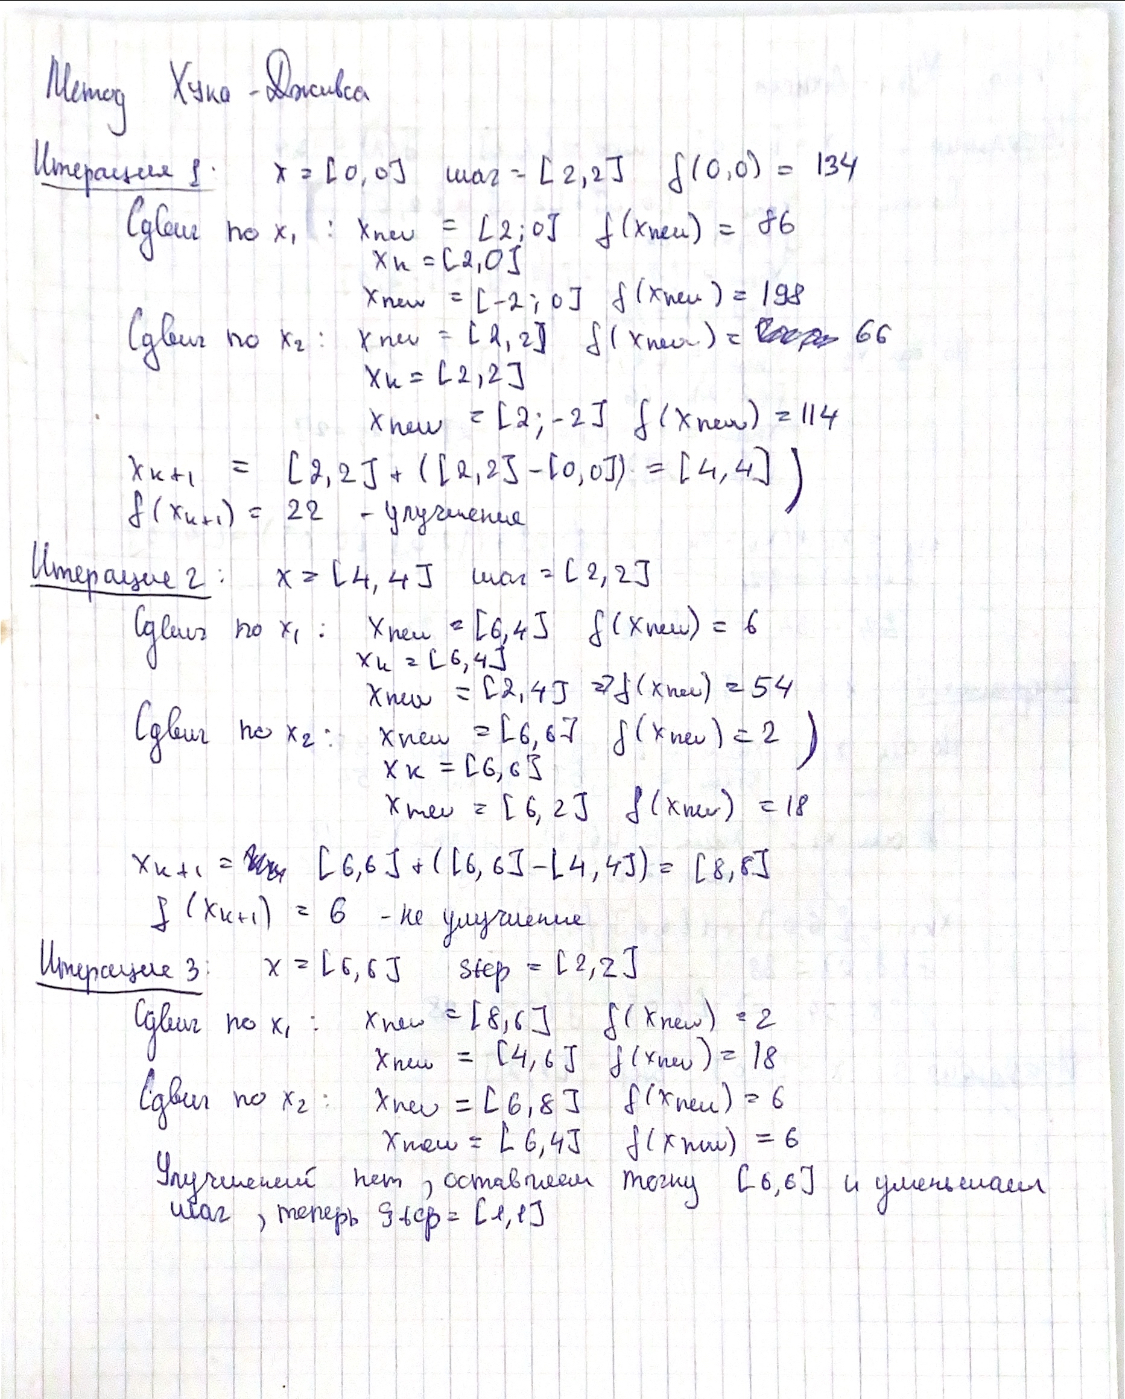

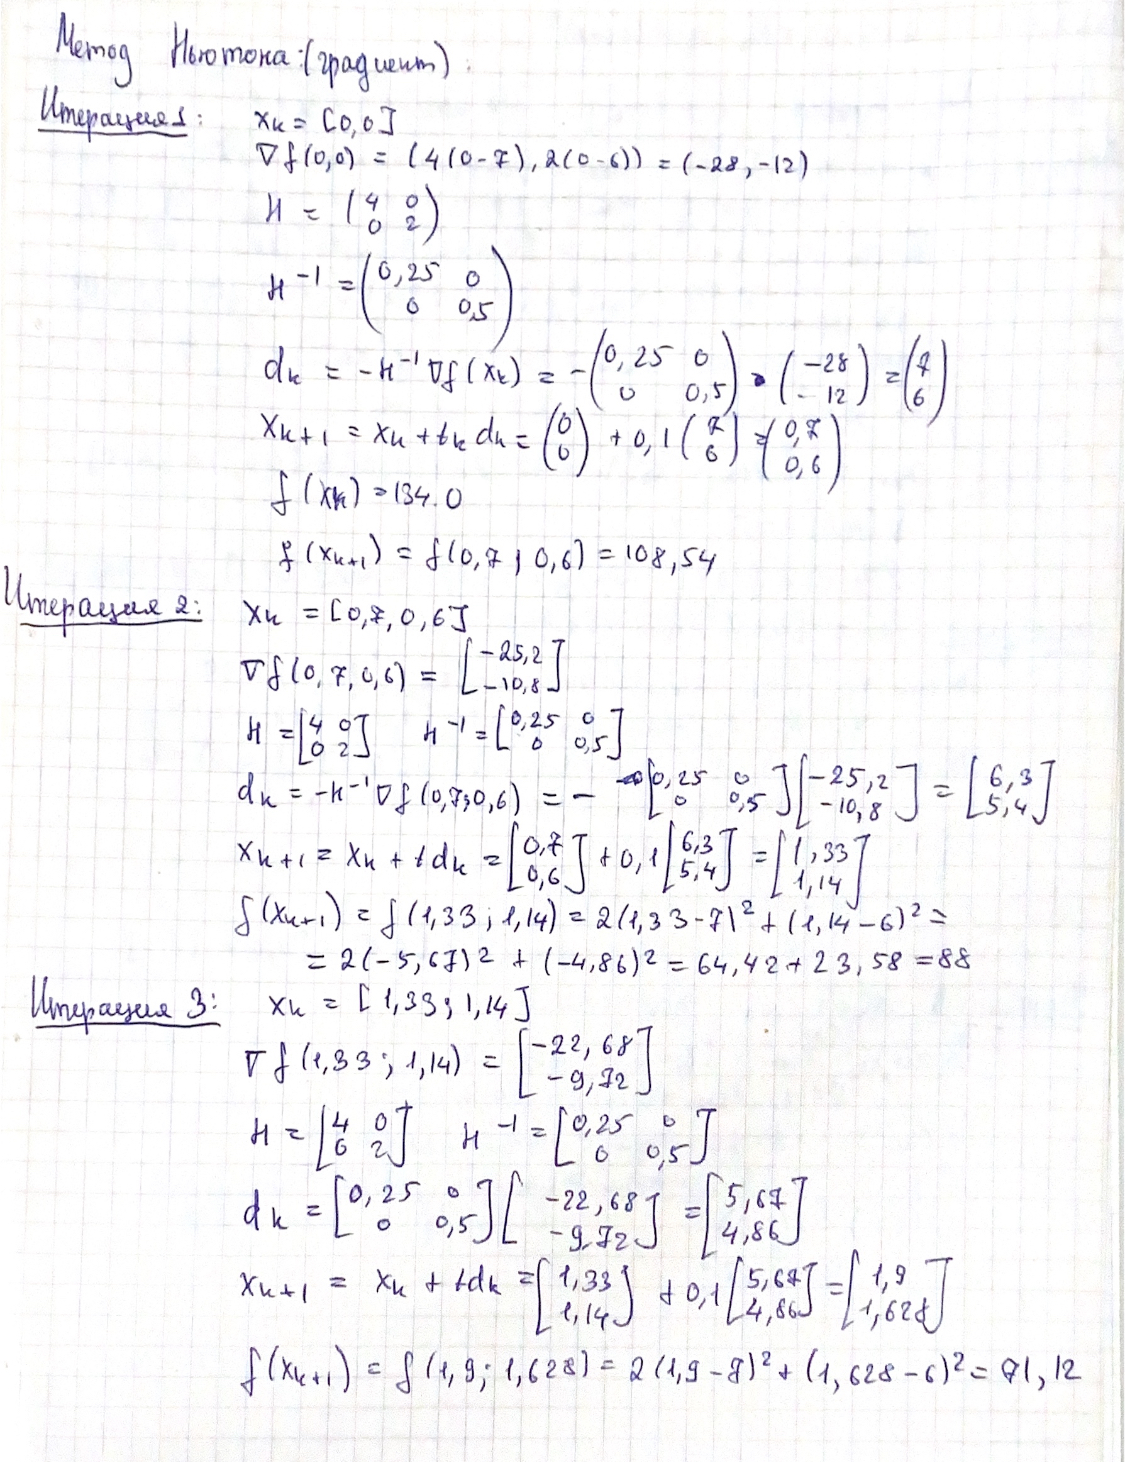